# Sprawozdanie - MOwNiT - laboratorium 2.

#### Autor: Jakub Psarski

## 1. Metoda Gaussa-Jordana

Napisz i sprawdź funkcję rozwiązującą układ równań liniowych $n \times n$ metodą Gaussa-Jordana z częściowym poszukiwaniem elementu wiodącego. Dla dziesięciu różnych rozmiarów macierzy współczynników większych niż $500 \times 500$ porównaj czasy działania zaimplementowanej funkcji z czasami uzyskanymi dla wybranych funkcji bibliotecznych.

### Importowanie potrzebnych bibliotek

In [32]:
import time
import numpy as np

### Implementacja metody Gaussa-Jordana

In [33]:
def gauss_jordan_upper(matrix, vector):
    matrix_size = len(matrix)
    matrix_extended = np.hstack([matrix.astype(float), vector.reshape(-1, 1).astype(float)])

    for i in range(matrix_size):
        max_row = np.argmax(abs(matrix_extended[i:, i])) + i
        if i != max_row:
            matrix_extended[[i, max_row]] = matrix_extended[[max_row, i]]

        matrix_extended[i] /= matrix_extended[i, i]

        for j in range(i + 1, matrix_size):
            matrix_extended[j] -= matrix_extended[i] * matrix_extended[j, i]

    return matrix_extended[:, :-1], matrix_extended[:, -1]


### Funkcje pomocnicze

- Rozwiązanie równania w formie macierzy trójkątnej górnej przez podstawianie wstecz

In [34]:
def back_substitution(matrix_upper, vector):
    matrix_size = len(matrix_upper)
    result = np.zeros(matrix_size)

    for i in range(matrix_size - 1, -1, -1):
        result[i] = (vector[i] - np.dot(matrix_upper[i, i+1:], result[i+1:])) / matrix_upper[i, i]

    return result

- Funkcja rozwiązująca układ równań

In [35]:
def solve_system(matrix, vector):
    matrix_upper, vector_new = gauss_jordan_upper(matrix, vector)
    return back_substitution(matrix_upper, vector_new)

### Test poprawności i porównanie czasów działania

In [36]:
sizes = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 2137]

for matrix_size in sizes:
    matrix = np.random.rand(matrix_size, matrix_size)
    vector = np.random.rand(matrix_size)

    start = time.time()
    gj_result = solve_system(matrix, vector)
    gj_time = time.time() - start

    start = time.time()
    np_result = np.linalg.solve(matrix, vector)
    np_time = time.time() - start

    success = np.allclose(gj_result, np_result)

    print(f"Size {matrix_size}x{matrix_size}: Gauss-Jordan = {gj_time:.4f}s, NumPy = {np_time:.4f}s, "
            f"Ratio = {gj_time / np_time:.4f}, Success = {success}")

Size 500x500: Gauss-Jordan = 0.5186s, NumPy = 0.0048s, Ratio = 108.7600, Success = True
Size 600x600: Gauss-Jordan = 0.8210s, NumPy = 0.0075s, Ratio = 109.0089, Success = True
Size 700x700: Gauss-Jordan = 0.9727s, NumPy = 0.0132s, Ratio = 73.7128, Success = True
Size 800x800: Gauss-Jordan = 1.3107s, NumPy = 0.0187s, Ratio = 70.1883, Success = True
Size 900x900: Gauss-Jordan = 1.8242s, NumPy = 0.0269s, Ratio = 67.8583, Success = True
Size 1000x1000: Gauss-Jordan = 2.3321s, NumPy = 0.0306s, Ratio = 76.1982, Success = True
Size 1100x1100: Gauss-Jordan = 2.7681s, NumPy = 0.0425s, Ratio = 65.1653, Success = True
Size 1200x1200: Gauss-Jordan = 3.4478s, NumPy = 0.0519s, Ratio = 66.4768, Success = True
Size 1300x1300: Gauss-Jordan = 4.0031s, NumPy = 0.0656s, Ratio = 61.0503, Success = True
Size 2137x2137: Gauss-Jordan = 14.2067s, NumPy = 0.2732s, Ratio = 51.9930, Success = True


## 2. Faktoryzacja LU

Napisz i przetestuj funkcję dokonującą faktoryzacji $\mathbf{A} = \mathbf{L}\mathbf{U}$ macierzy $\mathbf{A}$ (bez poszukiwania elementu wiodącego). Sprawdź poprawność wyniku obliczając $\|\mathbf{A} - \mathbf{L}\mathbf{U}\|$. Zadbaj o to żeby implementacja była in-situ. Elementy macierzy $\mathbf{L}$ to współczynniki mnożenia umożliwiające wyzerowanie odpowiedniego  współczynnika macierzy $\mathbf{A}$ w trakcie procesu eliminacji.

### Implementacja faktoryzacji LU

In [37]:
def lu_factorization(matrix):
    matrix_size = len(matrix)
    lower = np.eye(matrix_size)
    upper = matrix.copy()

    for i in range(matrix_size):
        for j in range(i + 1, matrix_size):
            lower[j, i] = upper[j, i] / upper[i, i]
            upper[j] -= upper[i] * lower[j, i]

    return lower, upper

### Test poprawności i czasy działania

In [ ]:
sizes = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 2137]
low, high = -10**10, 10**10

for matrix_size in sizes:
    matrix = np.random.uniform(low, high, size=(matrix_size, matrix_size))
    matrix_orig = matrix.copy()

    start = time.time()
    lower, upper = lu_factorization(matrix)
    end = time.time()

    error = np.linalg.norm(matrix_orig - lower @ upper)
    print(f"Size {matrix_size}x{matrix_size}: Absolute error = {error:.6e}, "
            f"Relative er ror = {(error*100)/high:.10f}%, Time = {end - start:.4f}s")

Size 500x500: Absolute error = 4.900638e-01, Relative error = 0.0000000049%, Time = 0.5025s
Size 600x600: Absolute error = 2.707642e+00, Relative error = 0.0000000271%, Time = 0.8833s
Size 700x700: Absolute error = 1.468873e+01, Relative error = 0.0000001469%, Time = 1.1156s
Size 800x800: Absolute error = 4.319795e+01, Relative error = 0.0000004320%, Time = 1.5041s
Size 900x900: Absolute error = 4.383645e+00, Relative error = 0.0000000438%, Time = 1.9850s
Size 1000x1000: Absolute error = 4.185371e+00, Relative error = 0.0000000419%, Time = 2.4712s
Size 1100x1100: Absolute error = 1.224755e+02, Relative error = 0.0000012248%, Time = 3.0991s
Size 1200x1200: Absolute error = 1.799205e+01, Relative error = 0.0000001799%, Time = 4.3621s
Size 1300x1300: Absolute error = 1.396506e+01, Relative error = 0.0000001397%, Time = 4.7042s
Size 2137x2137: Absolute error = 3.820769e+01, Relative error = 0.0000003821%, Time = 15.5052s


## 3. Analiza obwodu elektrycznego

Napisz program, który:
- Wczytuje z pliku listę krawędzi grafu nieskierowanego ważonego opisującego obwód elektryczny. Wagi krawędzi określają opór fragmentu obwodu między dwoma węzłami. Wierzchołki grafu identyfikowane są przez liczby naturalne.

- Wczytuje dodatkowo trójkę liczb $(s, t, E)$, przy czym para $(s, t)$ wskazuje między którymi węzłami sieci przyłożono siłę elektromotoryczną $E$. Opór wewnętrzny $SEM$ można zaniedbać.

- Wykorzystując prawa Kirchhoffa (albo metodę potencjałów węzłowych) znajduje natężenia prądu w każdej części obwodu i przedstawia je na rysunku w postaci grafu ważonego z etykietami (wizualizacja grafu wraz z kolorowymi krawędziami pokazującymi wartość natężenia prądu oraz jego kierunek).

- Przedstaw (wizualizacja + automatyczne sprawdzenie poprawności wyników) działanie programu dla grafów spójnych mających od 15 do 200 wierzchołków. Rozważ następujące typy grafów:
    - Spójny graf losowy (Erd ̋os-R ́enyi)
    - Graf 3-regularny (kubiczny)
    - Graf złożony z dwóch grafów losowych połaczonych mostkiem
    - Graf siatka 2D
    - Graf typu small-world

- Skomentuj wybrane rozwiązanie - prawa Kirchoffa I, II vs. metoda potencjałów węzłowych. W przypadku korzystania z praw Kirchoffa - w jaki sposób możemy rozwiązać nadokreślony układ równań. Opisz najważniejsze aspekty swojego rozwiązania (kierunek prądu, weryfikacja poprawności rozwiązania, sposób wyznaczania cykli prostych).

### Importowanie potrzebnych bibliotek

In [39]:
import os
import matplotlib.pyplot as plt
import networkx as nx

### Główna funkcja - `kirchhoff_analysis()` - obliczanie natężeń z wykorzystaniem praw Kirchhoffa

Natężenia są obliczane z wykorzystaniem praw Kirchhoffa - funkcja analizuje najpierw węzły obwodu pod kątem prądu wpływającego i wypływającego (I prawo Kirchhoffa - $\sum_{k=1}^{n} I_k = 0$), a następnie wszystkie cykle proste pod kątem sumy spadków napięć na krawędziach (II prawo Kirchhoffa - $\sum_{k=1}^{n} U_k = 0$). Na podstawie tej analizy funkcja tworzy nadokreślony układ równań liniowych i rozwiązuje go metodą najmniejszych kwadratów (`np.linalg.lstsq()`), uzyskując w ten sposób wartości natężenia prądu płynącego przez krawędzie. Ostatecznie funkcja dostosowuje kierunki krawędzi w grafie skierowanym reprezentującym obwód do znaków płynących przez nie natężeń, aby odpowiednio ilustrować kierunek przepływu prądu.

In [40]:
def kirchhoff_analysis(graph, source, target, voltage):
    # Add a direct edge between source and target with near 0 resistance, representing the voltage source
    graph.add_edge(source, target, resistance=1e-10)

    edges = list(graph.edges())
    cycles = nx.cycle_basis(graph.to_undirected())

    # Equation system setup
    node_amount = graph.number_of_nodes()
    equation_amount = len(cycles) + node_amount
    matrix = np.zeros((equation_amount, equation_amount))
    vector = np.zeros(equation_amount)

    # KCL - node analysis
    for node_idx, node in enumerate(list(graph.nodes())):
        for out_edge in graph.out_edges(node):
            matrix[node_idx, edges.index(out_edge)] = 1
        for in_edge in graph.in_edges(node):
            matrix[node_idx, edges.index(in_edge)] = -1

    # KVL - mesh analysis
    for cycle_idx, cycle in enumerate(cycles):
        row_idx = node_amount + cycle_idx

        for node_idx, node in enumerate(cycle):
            neighbor = cycle[(node_idx + 1) % len(cycle)]

            # Verify if the edge represents the voltage source
            if (node, neighbor) == (source, target):
                vector[row_idx] = voltage
            elif (node, neighbor) == (target, source):
                vector[row_idx] = -voltage

            if graph.has_edge(node, neighbor):
                matrix[row_idx, edges.index((node, neighbor))] = graph.edges[(node, neighbor)]['resistance']
            elif graph.has_edge(neighbor, node):
                matrix[row_idx, edges.index((neighbor, node))] = -graph.edges[(neighbor, node)]['resistance']
            else:
                continue

    # Solve the overdetermined system
    currents = np.linalg.lstsq(matrix, vector)[0]

    # Add currents to the graph and adjust edge directions
    for i, (node_1, node_2) in enumerate(graph.copy().edges()):
        if currents[i] < 0:
            resistance = graph.edges[node_1, node_2]['resistance']
            graph.remove_edge(node_1, node_2)
            graph.add_edge(node_2, node_1, resistance=resistance)
            (node_1, node_2), currents[i] = (node_2, node_1), -currents[i]
        graph.edges[node_1, node_2]['current'] = currents[i]

### Funkcje pomocnicze

- `load_circuit()` - wczytywanie danych z pliku tekstowego i inicjalizacja obwodu w formie grafu skierowanego (początkowo kierunki krawędzi są arbitralne - nie reprezentują kierunków przepływu prądu)

In [41]:
def load_circuit(filename):
    graph = nx.DiGraph()
    with open(filename, 'r', encoding="utf-8") as file:
        for line in file:
            node_1, node_2, resistance = map(float, line.split())
            graph.add_edge(int(node_1), int(node_2), resistance=resistance)
    return graph

- `verify_circuit()` - weryfikacja poprawności obwodu wynikowego na podstawie spełnienia (bądź niespełnienia) przez obwód obu praw Kirchhoffa

In [42]:
def verify_circuit(graph, source, target, voltage, eps):
    current_max = max(abs(current) for _, _, current in graph.edges(data='current'))
    cycles = nx.cycle_basis(graph.to_undirected())

    # KCL
    for node in graph.nodes():
        current_in = sum(graph.edges[edge]['current'] for edge in graph.in_edges(node))
        current_out = sum(graph.edges[edge]['current'] for edge in graph.out_edges(node))

        if abs(current_in - current_out) > eps * current_max:
            print(f"Node {node} violates KCL: In={current_in}, Out={current_out}")
            return False

    # KVL
    for cycle in cycles:
        cycle_voltage = 0

        for i, node in enumerate(cycle):
            neighbor = cycle[(i + 1) % len(cycle)]

            # Voltage source contribution
            if (node, neighbor) == (source, target):
                cycle_voltage += voltage
            elif (node, neighbor) == (target, source):
                cycle_voltage -= voltage

            # Resistor voltage drops
            if graph.has_edge(node, neighbor):
                cycle_voltage -= graph[node][neighbor]['resistance'] * graph[node][neighbor]['current']
            elif graph.has_edge(neighbor, node):
                cycle_voltage += graph[neighbor][node]['resistance'] * graph[neighbor][node]['current']

        if abs(cycle_voltage) > eps * voltage:
            print(f"KVL Violation in Cycle: {cycle}")
            return False

    return True

- `draw_circuit()` - rysowanie obwodu wraz z wizualizacją kierunku i natężenia prądu

In [43]:
def draw_circut(graph, graph_type, eps):
    currents = [current for _, _, current in graph.edges(data='current')]
    current_min = 0
    current_max = max(currents)
    edge_labels = {e: f"{(i if i > eps * current_max else 0):.3g} A"
                   for e, i in nx.get_edge_attributes(graph, 'current').items()}

    plt.figure(figsize=(16, 9))
    match(graph_type):
        case "Grid":
            pos = nx.spectral_layout(graph)
        case "Small world":
            even = [node for node in graph.nodes() if node % 2 == 0]
            odd = [node for node in graph.nodes() if node % 2 == 1]
            pos = nx.shell_layout(graph, nlist=[sorted(even), sorted(odd)], rotate=0)
        case _:
            pos = nx.kamada_kawai_layout(graph)
    nx.draw_networkx_nodes(graph, pos, node_color='black')
    nx.draw_networkx_labels(graph, pos, font_color='white')
    nx.draw_networkx_edges(graph, pos, width=2, edge_color=currents, edge_cmap=plt.cm.plasma,
                           edge_vmin=current_min, edge_vmax=current_max, arrowsize=30)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=7)
    plt.title(f"{graph_type} circuit")
    plt.axis('off')
    plt.show()

### Funkcje generujące dane testowe

- `save_graph_to_file()` - zapisywanie grafu do pliku tekstowego

In [44]:
def save_graph_to_file(graph, filename):
    directory = os.path.join(os.path.dirname(os.path.abspath("__file__")), "test_graphs")
    os.makedirs(directory, exist_ok=True)
    file_path = os.path.join(directory, filename)

    with open(file_path, 'w', encoding="utf-8") as file:
        for node_1, node_2 in graph.edges():
            resistance = np.random.uniform(0.5, 10)
            file.write(f"{node_1} {node_2} {resistance}\n")

- `generate_test_graphs()` - generowanie grafów testowych

In [45]:
def generate_test_graphs(nodes):
    bridge_connected_graph = nx.disjoint_union(nx.erdos_renyi_graph(nodes // 2, 0.2),
                                               nx.erdos_renyi_graph(nodes // 2, 0.2))
    bridge_connected_graph.add_edge(0, nodes // 2)

    graph_types = {
        "erdos_renyi.txt": nx.erdos_renyi_graph(nodes, 0.1),
        "cubic_graph.txt": nx.random_regular_graph(3, nodes),
        "grid_graph.txt": nx.convert_node_labels_to_integers(nx.grid_2d_graph(int(np.sqrt(nodes)),
                                                                              int(np.sqrt(nodes)))),
        "small_world_graph.txt": nx.watts_strogatz_graph(nodes, 4, 0.2),
        "bridge_connected_graph.txt": bridge_connected_graph
    }

    for filename, graph in graph_types.items():
        save_graph_to_file(graph, filename)

### Test poprawności, czasy działania, wizualizacja

Erdos-Renyi: OK
Time elapsed: 0.00s


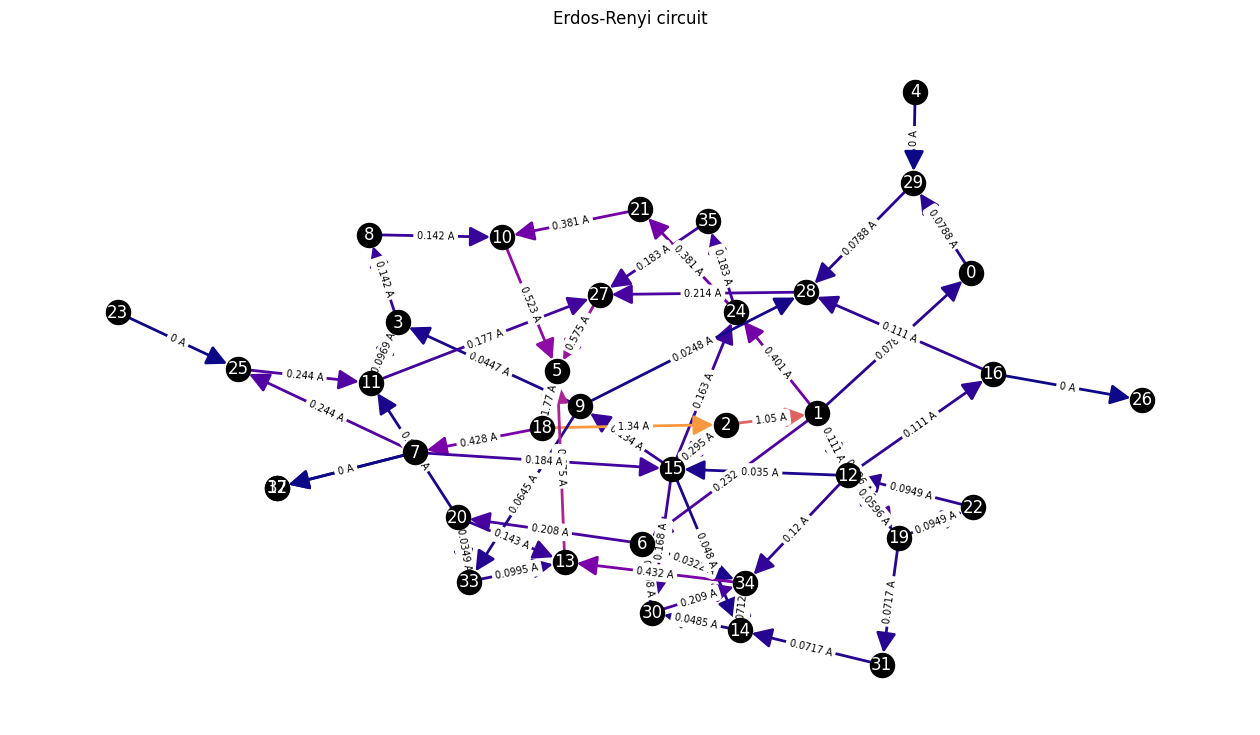

Cubic: OK
Time elapsed: 0.00s


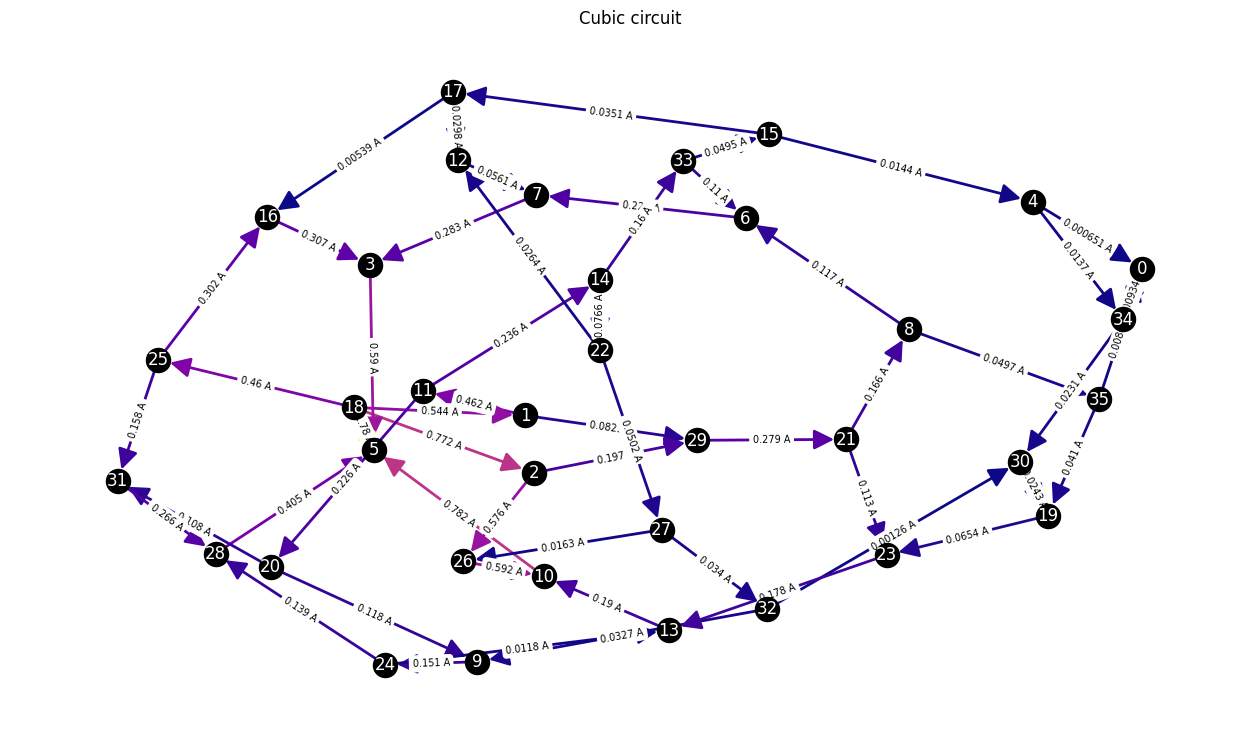

Grid: OK
Time elapsed: 0.00s


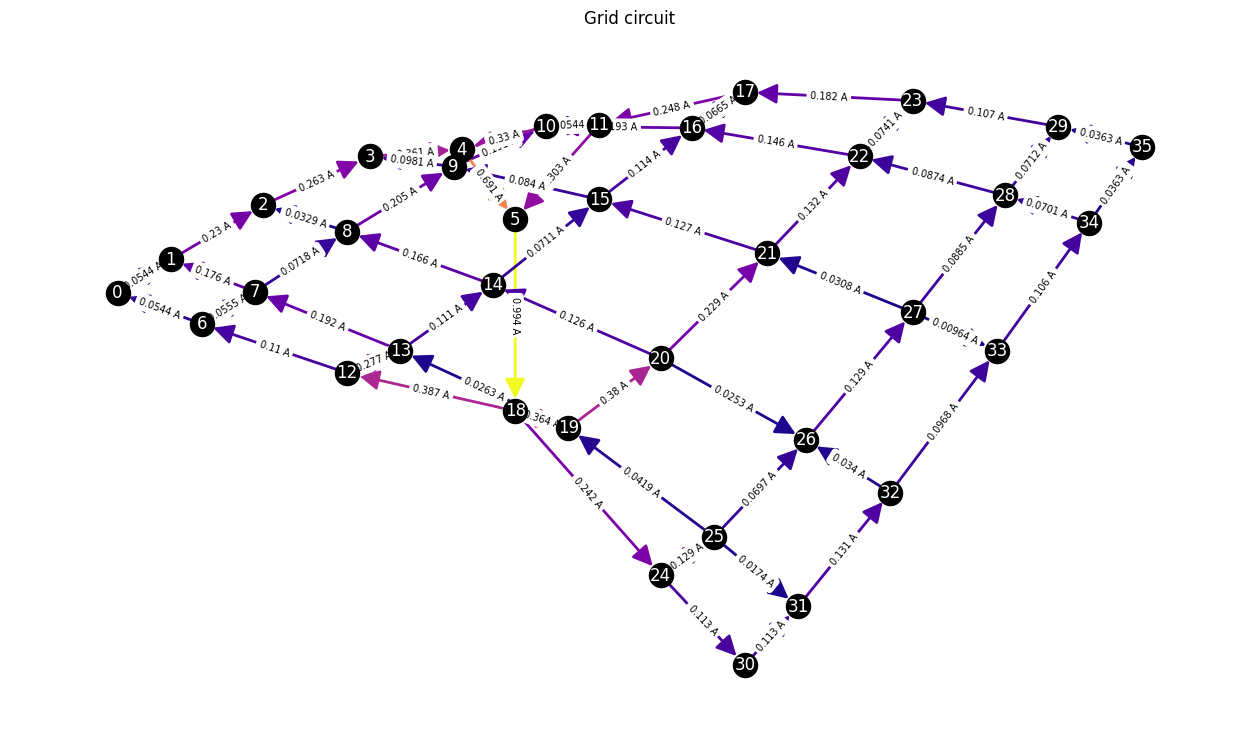

Small world: OK
Time elapsed: 0.00s


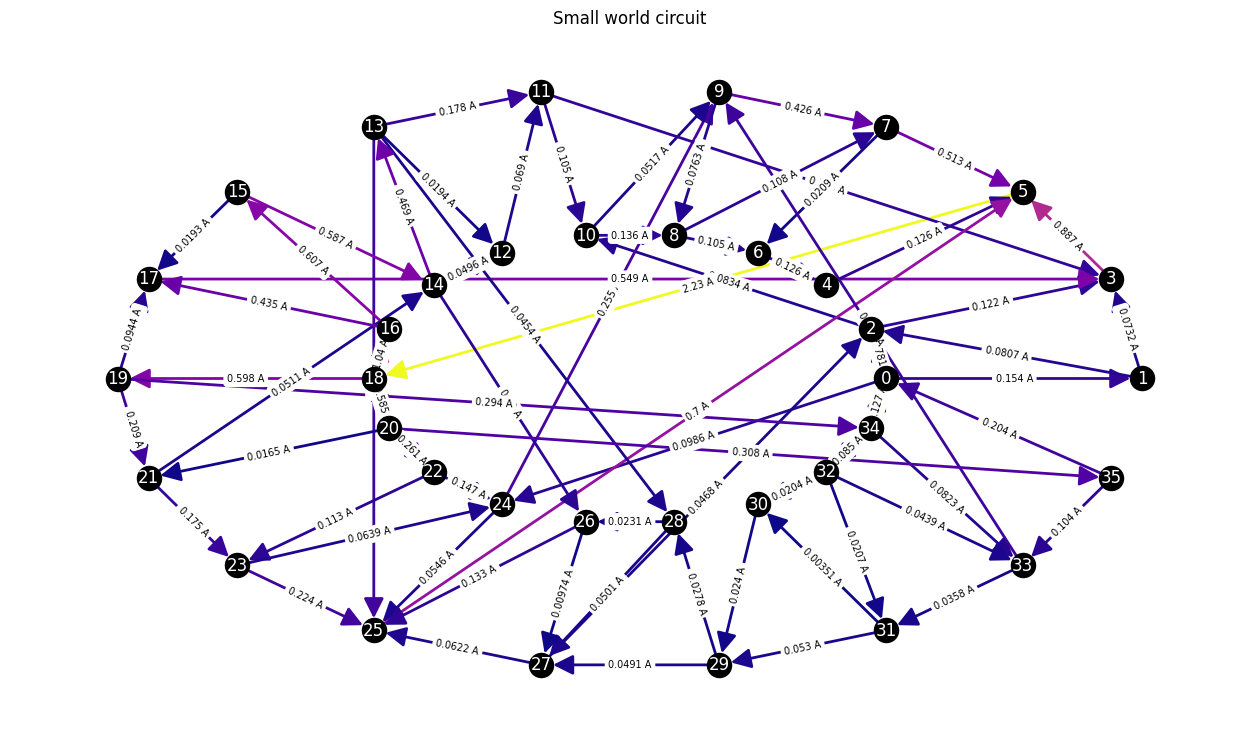

Bridge-connected: OK
Time elapsed: 0.00s


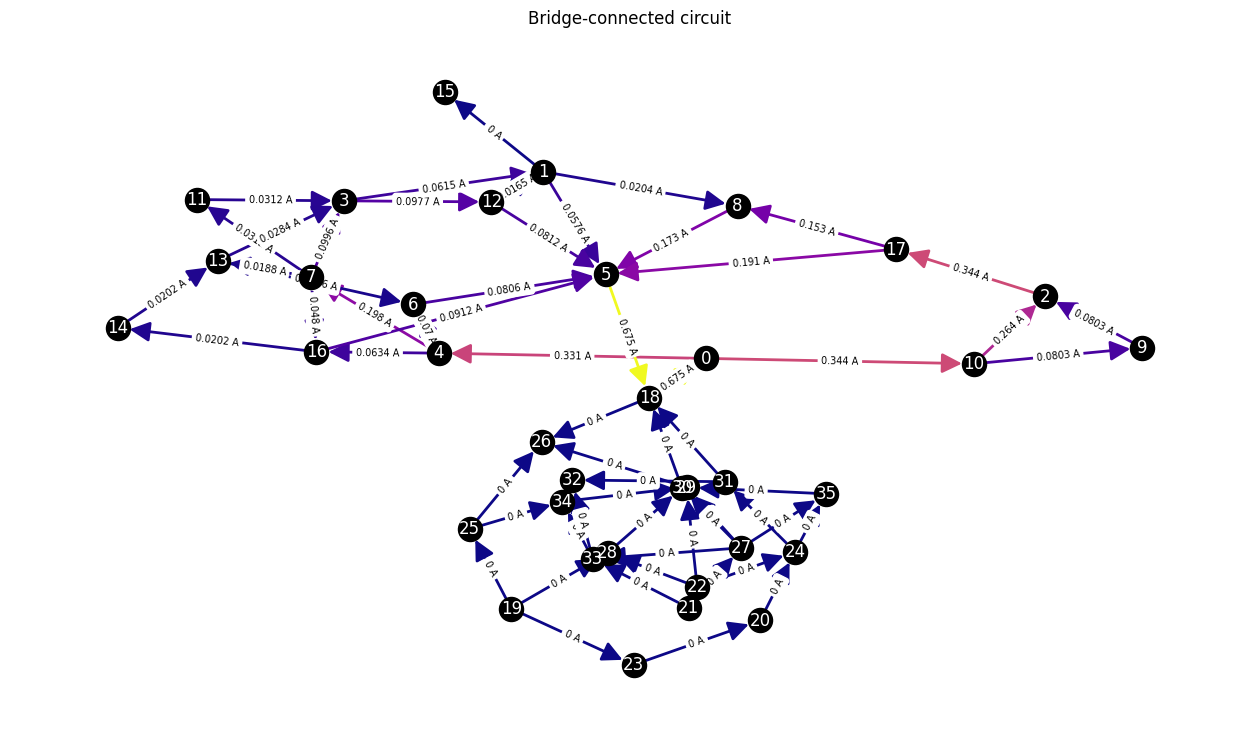

In [46]:
SOURCE = 5
TARGET = 18
VOLTAGE = 10
NODES = 36
EPS = 1e-10

generate_test_graphs(NODES)
directory = os.path.join(os.path.dirname(os.path.abspath("__file__")), "test_graphs")
graphs = {
    "Erdos-Renyi":      load_circuit(os.path.join(directory, "erdos_renyi.txt")),
    "Cubic":            load_circuit(os.path.join(directory, "cubic_graph.txt")),
    "Grid":             load_circuit(os.path.join(directory, "grid_graph.txt")),
    "Small world":      load_circuit(os.path.join(directory, "small_world_graph.txt")), 
    "Bridge-connected": load_circuit(os.path.join(directory, "bridge_connected_graph.txt"))
    }

for graph_type, graph in graphs.items():
    start_time = time.time()
    kirchhoff_analysis(graph, SOURCE, TARGET, VOLTAGE)
    end_time = time.time()
    print(f"{graph_type}: {"OK" if verify_circuit(graph, SOURCE, TARGET, VOLTAGE, EPS) else "FAILED"}")
    print(f"Time elapsed: {end_time-start_time:.2f}s")
    draw_circut(graph, graph_type, EPS)